In [1]:
import os
from collections import defaultdict
import random
import matplotlib.pyplot as plt
from functools import reduce
from random import choices
import math
import gc 

%matplotlib inline
# plt.rcParams["figure.figsize"] = [12, 8]

## Task 1

In [2]:
DATA_PATH = "./data"
WIKI_PATH = DATA_PATH + "/wiki"
TEST_PATH = DATA_PATH + "/test"

COMPARISON_ORDER = 6

def read_text_sources(dir_path):
    texts = []
    for filePath in os.listdir(dir_path):
        with open(os.path.join(dir_path, filePath), "r") as file:
            texts.append(file.read())
    return texts

In [3]:
def count_letters(text_sources):
    counter = defaultdict(int)
    for text_source in text_sources:
        for letter in text_source:
            counter[letter] += 1
    return counter


def generaty_probabilities(text_sources):
    counter = count_letters(text_sources)
    sum_of_occurences = sum(counter.values())
    for key in counter.keys():
        counter[key] = counter[key] / sum_of_occurences
    return counter


def generate_text(text_sources, length):
    counter = generaty_probabilities(text_sources)
    letters, probabilities = list(counter.keys()), list(counter.values())
    return "".join(choices(letters, k=length, weights=probabilities))


def frequency_chart(counter):
    sorted_keys = sorted(counter.keys())
    plt.bar(sorted_keys, [counter[key] for key in sorted_keys])
    plt.show()

In [4]:
def add_d(a,b):
    if type(a) is tuple:
        return a+tuple((b,))
    return a+b


def gen_nth_order_probabilities(text, nth_order):
    zeroth_propabilities = generaty_probabilities([text])
    non_conditional_orders = [zeroth_propabilities.copy()]
    conditional_orders = [zeroth_propabilities.copy()]
    for n in range(1, nth_order + 1):
#         print("N: ", n)
        conditional_dict = defaultdict(lambda: defaultdict(int))
        non_conditional_dict = defaultdict(int)
        for l in range(len(text) - n):
            conditional_dict[text[l : l + n]][text[l + n]] += 1
        number_of_n_length_sequences = len(text) - n
        for key in conditional_dict.keys():
            sum_seq_occur = sum(conditional_dict[key].values())
            for sub_key in conditional_dict[key].keys():
                non_conditional_dict[add_d(key,sub_key)] = conditional_dict[key][sub_key] / number_of_n_length_sequences
                conditional_dict[key][sub_key] = conditional_dict[key][sub_key] / sum_seq_occur
        conditional_orders.append(conditional_dict)
        non_conditional_orders.append(non_conditional_dict)
    return conditional_orders, non_conditional_orders

In [5]:
def get_conditional_entropies(text, nth_order):
    conditional_probs, non_conditional_probs = gen_nth_order_probabilities(text, nth_order)
    conditional_entropies  = [0]*(nth_order+1)
    #0th order
    for key, prob in non_conditional_probs[0].items():
        conditional_entropies[0]+=prob*math.log2(1/prob)
    #1 + order
    for i in range(1,nth_order+1):
        cur_entropy = 0
        for key, prob in non_conditional_probs[i].items():
            cur_entropy += prob*math.log2(1/conditional_probs[i][key[:-1]][key[-1]])
        conditional_entropies[i] = cur_entropy
    return conditional_entropies

In [10]:
def calc_entropies(filePath):
    with open(filePath, "r") as file:
        text=file.read()
    gc.collect()
    print(filePath)
    letter_entropies = get_conditional_entropies(text, COMPARISON_ORDER)
    plt.plot([i for i in range(COMPARISON_ORDER+1)], letter_entropies, label = "letter entropies")
    word_entropies = get_conditional_entropies(tuple(text.split()), COMPARISON_ORDER)
    plt.plot([i for i in range(COMPARISON_ORDER+1)], word_entropies, label = "word entropies")
    plt.legend()
    plt.show()
    print(letter_entropies)
    print(word_entropies)

norm_wiki_ht.txt


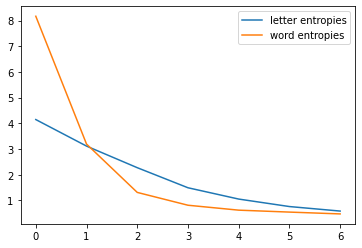

[4.146385764101037, 3.1138604806021357, 2.273524831268281, 1.4921524582748749, 1.0521432391231005, 0.7609352868367987, 0.584916522415365]
[8.166919505035342, 3.193112994079618, 1.3113254516229174, 0.8122267949332048, 0.6205720742965245, 0.5454059966236461, 0.4743970219866663]
norm_wiki_eo.txt


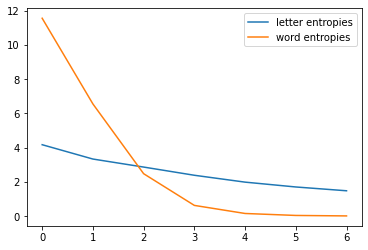

[4.176788490262166, 3.340005176314087, 2.8718267987596153, 2.3926250001742098, 1.9915100520666937, 1.7090182499932616, 1.4872676800967288]
[11.560529950317907, 6.557678791146433, 2.4847195982715844, 0.6336182904597191, 0.16165828758952883, 0.046905963932541296, 0.019293900156626194]
norm_wiki_nv.txt


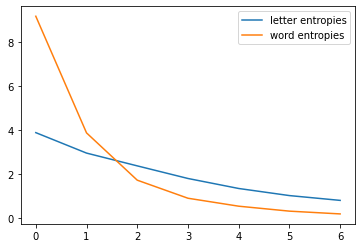

[3.8749372588209434, 2.9472671465949576, 2.367579621897086, 1.7952629128164133, 1.3415964492397379, 1.0198444524415557, 0.8019897836684196]
[9.15401183080255, 3.863931347467016, 1.718804199448402, 0.8992519126691114, 0.5385700572391845, 0.31384587253872476, 0.1882774986877837]
norm_wiki_et.txt


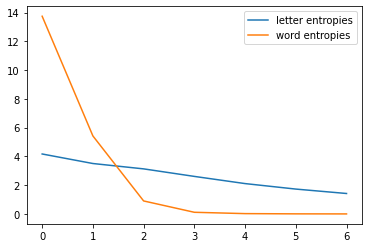

[4.169833224728489, 3.5069581563728938, 3.1344061132062535, 2.6108656535592436, 2.1114422737181266, 1.729721239949253, 1.4227337717230106]
[13.746243545091751, 5.424182735154944, 0.9047403322074711, 0.11619701012001536, 0.023647299885484287, 0.007509992883867929, 0.002907437157843066]
norm_wiki_en.txt


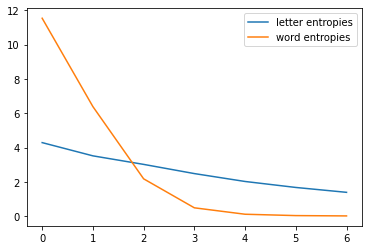

[4.288221453845132, 3.5166047989860187, 3.018319190791138, 2.4815659195766586, 2.0211849323217086, 1.6724087188003098, 1.3876961833836277]
[11.543993773635416, 6.3891750659634585, 2.176460456201663, 0.48467886887247624, 0.1096531537240455, 0.030771104451539768, 0.011965170283963274]
norm_wiki_so.txt


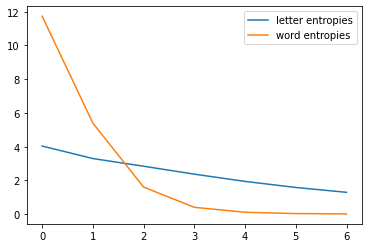

[4.04011386038252, 3.299565873145861, 2.844371623926448, 2.374310593176142, 1.9450324843384685, 1.5862750471254847, 1.2985442797376914]
[11.731104737245332, 5.3987381933512415, 1.6086239389559995, 0.4096065365721564, 0.11661094741552985, 0.03950652125029179, 0.019553339076385696]
norm_wiki_la.txt


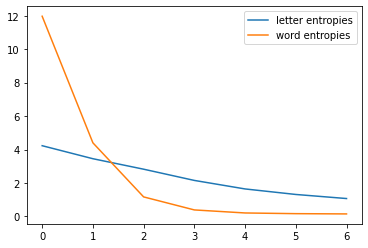

[4.228247465746812, 3.4501260596144276, 2.8234920125311245, 2.152031337421536, 1.6427637761375735, 1.3127474600541948, 1.0690514489684808]
[11.969194044355133, 4.400025431237082, 1.1668830347263794, 0.3880347336496217, 0.206468218244631, 0.165107469399592, 0.14958959468320393]


In [7]:
for filePath in os.listdir(WIKI_PATH):
    calc_entropies(os.path.join(WIKI_PATH, filePath))

./data/test/sample0.txt


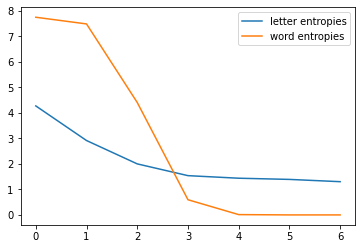

[4.273001240566633, 2.915894004347893, 2.0003592449348733, 1.5392818308881384, 1.4385817627111692, 1.3919684277441153, 1.302845484804238]
[7.748741386140158, 7.486391705240514, 4.406703462159543, 0.5950087061854483, 0.012062127698812566, 0.00010111418198626786, 3.2099766072954744e-06]
./data/test/sample1.txt


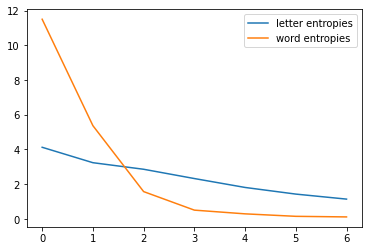

[4.1270061355497205, 3.239149992123346, 2.8612796847871955, 2.3266847405634272, 1.813510009114478, 1.4311245601440736, 1.142002846540559]
[11.500698483659841, 5.372245318603172, 1.5747393031016652, 0.5075112949820157, 0.2934580669379857, 0.15056527857617474, 0.11672961361761346]
./data/test/sample2.txt


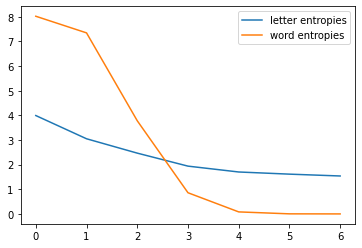

[3.993311800232584, 3.050439282781129, 2.4676602357415525, 1.9397723261443964, 1.7020325739558675, 1.6144131898640979, 1.5398778331720882]
[8.023869815826423, 7.348623166132961, 3.781936098873708, 0.859505963114632, 0.08199123582453278, 0.0029870100338626644, 8.01393355914817e-05]
./data/test/sample3.txt


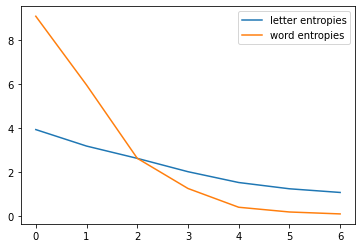

[3.930297834157987, 3.184467067095424, 2.6278957095513036, 2.023991488805842, 1.534243355401023, 1.250413547177474, 1.0840535493766565]
[9.061119324692852, 5.950220848452501, 2.630807418223316, 1.2640914239206222, 0.41432739497179144, 0.20012327783102177, 0.11278446028462888]
./data/test/sample4.txt


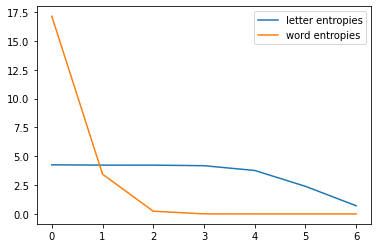

[4.2538095673790135, 4.229101430962357, 4.226828937890972, 4.178535148281906, 3.7661315160327113, 2.3905711562582774, 0.7084144266126883]
[17.129669110943123, 3.4442531122077646, 0.2340760170378599, 0.0032274276117648373, 7.608894145064654e-06, 0.0, 0.0]
./data/test/sample5.txt


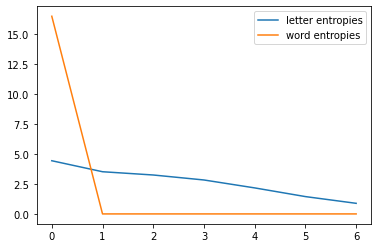

[4.441688018481797, 3.523098126085035, 3.2506208546492124, 2.834271485651657, 2.1724407900555236, 1.4468678917946378, 0.8847412433192684]
[16.50952760746038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


3147

In [12]:
for filePath in sorted(os.listdir(TEST_PATH)):
    calc_entropies(os.path.join(TEST_PATH, filePath))
    
gc.collect()

## Conclusions

### sample0 - yes/no
no because -word entropy behaves strange and character entrpoy falls rapidly at the bigining and has some kind of asymptote, while in real language decrease is closer to linear. However, later friend and I found out that animal languages can have similar entropy characteristic, so if we consider animal laguage a language than this text might be its transcription to human alphabet

### sample1 - yes
both shapes of letter entropy and word entropy charts are very simmilar to example languages

### sample2 - yes/no
no because - word entropy behaves strange and character entrpoy falls rapidly at the bigining and has some kind of asymptote, while in real language decrease is closer to linear . However, later friend and I found out that animal languages can have similar entropy characteristic, so if we consider animal laguage a language than this text might be its transcription to human alphabet

### sample3 - yes
both shapes of letter entropy and word entropy charts are very simmilar to example languages

### sampe4 - no
character entropy is almost constant up to 3 order and than starts to fall fast, it might be due to the fact the text is text is too short for it to have enough long random sequences. Also word entropy falls to fast to 0

### sample5 - no
it cannot be a langauge, because we could generate whole text having a single word